In [1]:
import os
import pandas as pd
import pyodbc
os.getcwd()

'c:\\Users\\thire\\Documents\\School\\AdvanceDataManagement\\CAS_764_Project'

# Demo Table code - Do not run

In [23]:
#connection = pyodbc.connect(Trusted_Connection='yes', driver = '{SQL Server}',server = 'LAPTOP-GTKQ06EG\SQLEXPRESS' , database = 'ADM') #pyodbc.connect(conn_str)

from sqlalchemy import create_engine

# Define your SQL Server connection string
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
connection_string = f'mssql+pyodbc://@{server_name}/{database_name}?driver=SQL+Server'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
print('Connection True')
# Define the folder where your CSV files are located
csv_folder = 'mimic-iii-clinical-database-demo-1.4'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Iterate through each CSV file and write it to the SQL Server
for csv_file in csv_files:
    table_name = os.path.splitext(csv_file)[0]  # Use the file name as the table name
    csv_path = os.path.join(csv_folder, csv_file)

    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_path)

    # Write the DataFrame to the SQL Server table
    df.to_sql(table_name, engine, if_exists='replace', index=False)

print("CSV files have been imported into SQL Server tables.")



Connection True


C:\Users\thire\AppData\Local\Temp\ipykernel_7736\583839620.py:25: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
C:\Users\thire\AppData\Local\Temp\ipykernel_7736\583839620.py:25: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


CSV files have been imported into SQL Server tables.


# Test connection

In [20]:
import pyodbc

# Set your SQL Server connection details
server_name = '.\SQLEXPRESS'  # You can also use '127.0.0.1'
database_name = 'ADM'  # Replace with the name of your database
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password

# Create a connection to the local SQL Server Express using Windows Authentication
#conn_str = f'DRIVER={{SQL SERVER}};SERVER={server_name};DATABASE={database_name};UID={username};Trusted_Connection=yes'
connection = pyodbc.connect(Trusted_Connection='yes', driver = '{SQL Server}',server = 'LAPTOP-GTKQ06EG\SQLEXPRESS' , database = 'ADM') #pyodbc.connect(conn_str)

# Create a cursor to execute SQL commands
cursor = connection.cursor()

# Your SQL commands and queries go here
print('Done')

# Close the connection when you're done
connection.close()

Done


# Reformating files to csv

In [7]:
updated_csv_folder = '/Users/thire/Documents/School/AdvanceDataManagement/Project/Final_Data'
[f for f in os.listdir(updated_csv_folder) if f.endswith('.csv')]

['ADMISSIONS.csv',
 'CALLOUT.csv',
 'CAREGIVERS.csv',
 'DIAGNOSES_ICD.csv',
 'D_ICD_DIAGNOSES.csv',
 'PATIENTS.csv',
 'PRESCRIPTIONS.csv']

In [8]:
import os
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
connection_string = f'mssql+pyodbc://@{server_name}/{database_name}?driver=SQL+Server'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
print('Connection True')

# Define the folder where your updated CSV files are located
updated_csv_folder = '/Users/thire/Documents/School/AdvanceDataManagement/Project/Final_Data'

# List all updated CSV files in the folder
updated_csv_files = ['PATIENTS.csv']#[f for f in os.listdir(updated_csv_folder) if f.endswith('.csv')]

# Iterate through each updated CSV file and update the corresponding SQL Server table
for updated_csv_file in updated_csv_files:
    table_name = os.path.splitext(updated_csv_file)[0]  # Use the file name as the table name
    updated_csv_path = os.path.join(updated_csv_folder, updated_csv_file)

    # Read the updated CSV file into a Pandas DataFrame
    df_updated = pd.read_csv(updated_csv_path)

    # Update the SQL Server table with the new data
    df_updated.to_sql(table_name, engine, if_exists='replace', index=False)

print("Updated CSV files have been imported into SQL Server tables.")


Connection True
Updated CSV files have been imported into SQL Server tables.


In [5]:
import os
import gzip
import pandas as pd

# Define the folder where your gzipped files are located
gz_folder = '/Users/thire/Documents/School/AdvanceDataManagement/Project/mimic-iii-clinical-database-1.4'

# Define the folder where you want to save the CSV files
csv_folder = '/Users/thire/Documents/School/AdvanceDataManagement/Project/Final_Data'

# List all gzipped files in the folder
gz_files = ['/Users/thire/Documents/School/AdvanceDataManagement/Project/mimic-iii-clinical-database-1.4/PATIENTS.csv.gz']#[f for f in os.listdir(gz_folder) if f.endswith('.gz')]

# Iterate through each gzipped file and convert it to CSV
for gz_file in gz_files:
    gz_path = os.path.join(gz_folder, gz_file)
    
    # Define the output CSV file path
    csv_file = os.path.splitext(gz_file)[0]
    csv_path = os.path.join(csv_folder, csv_file)

    # Decompress the gzipped file and read it into a Pandas DataFrame
    with gzip.open(gz_path, 'rt') as f:
        df = pd.read_csv(f)

    # Save the DataFrame as a CSV file
    df.to_csv(csv_path, index=False)

print("Gzipped files have been decompressed and saved as CSV files.")

Gzipped files have been decompressed and saved as CSV files.


# 3D plot

# SQL QUERY

## Getting full Dataset

In [5]:
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string with a password
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password
connection_string = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server'


# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Write your SQL query
sql_query = '''
SELECT *
FROM ADM.[dbo].[FinalDataSet]
WHERE dose_val_rx not like '%-%'
    '''

# Execute the SQL query and store the result in a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)

# Now df contains the result of your SQL query as a Pandas DataFrame
print(df)

       subject_id  hadm_id  Died gender            admittime  \
0              62   116009     0      M  2113-02-15 00:19:00   
1              62   116009     0      M  2113-02-15 00:19:00   
2              62   116009     0      M  2113-02-15 00:19:00   
3              62   116009     0      M  2113-02-15 00:19:00   
4              62   116009     0      M  2113-02-15 00:19:00   
...           ...      ...   ...    ...                  ...   
23458       99517   144548     0      F  2104-10-06 13:55:00   
23459       99517   144548     0      F  2104-10-06 13:55:00   
23460       99517   144548     0      F  2104-10-06 13:55:00   
23461       99517   144548     0      F  2104-10-06 13:55:00   
23462       99517   144548     0      F  2104-10-06 13:55:00   

                 dischtime      religion marital_status  \
0      2113-02-19 15:30:00       UNKNOWN        MARRIED   
1      2113-02-19 15:30:00       UNKNOWN        MARRIED   
2      2113-02-19 15:30:00       UNKNOWN        MARRIE

## Getting dataset for visualization

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string with a password
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password
connection_string = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server'


# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Write your SQL query
sql_query = '''
SELECT 
	ethnicity
	, AVG(CAST(CAST(dose_val_rx AS VARCHAR(10)) AS FLOAT)) as avg
	, rn
	, formulary_drug_cd 
	, DENSE_RANK() OVER (ORDER BY formulary_drug_cd) AS DrugIndex
FROM ( 
	SELECT *
		,isnumeric(dose_val_rx) as isNumber
	FROM ADM.[dbo].[FinalDataSet]
	WHERE isnumeric(dose_val_rx) = 1
	) AS idk
GROUP BY ethnicity, rn, formulary_drug_cd
order by rn
    '''

# Execute the SQL query and store the result in a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)

# Now df contains the result of your SQL query as a Pandas DataFrame
print(df)



                    ethnicity     avg   rn formulary_drug_cd  DrugIndex
0                       WHITE   650.0    1           ACET325          8
1                       ASIAN   325.0    1           ACET325          8
2                       OTHER   150.0    1            ALBU25         26
3                       WHITE     1.0    1            ALBU3H         28
4      BLACK/AFRICAN AMERICAN     1.0    1            ALBU3H         28
...                       ...     ...  ...               ...        ...
15581                   OTHER     1.0   99             FOLI1        355
15582                   WHITE  1000.0   99            NS1000        671
15583                   WHITE   500.0   99             NS500        682
15584                   WHITE     1.5   99             WARF1        944
15585                   OTHER   500.0  100           CALC500        119

[15586 rows x 5 columns]


In [3]:

# Create a dictionary to store DataFrames for each ethnicity
ethnicity_dict = {}

# Iterate over unique ethnicities
for ethnicity in df['ethnicity'].unique():
    # Create a DataFrame for the current ethnicity
    ethnicity_df = df[df['ethnicity'] == ethnicity].copy()
    
    # Add the DataFrame to the dictionary
    ethnicity_dict[ethnicity] = ethnicity_df



# Access DataFrames for each ethnicity from the dictionary
#for ethnicity, ethnicity_df in ethnicity_dict.items():
#    print(f"DataFrame for {ethnicity}:\n{ethnicity_df}\n")

In [4]:
ethnicity_drug_dict = {}

# Iterate over unique ethnicities
for ethnicity in df['ethnicity'].unique():
    # Filter rows for the current ethnicity
    ethnicity_rows = df[df['ethnicity'] == ethnicity].copy()
    
    # Create an inner dictionary to store data for each drug
    drug_dict = {}
    
    # Iterate over unique drugs in the current ethnicity
    for drug in ethnicity_rows['formulary_drug_cd'].unique():
        # Filter rows for the current drug
        drug_rows = ethnicity_rows[ethnicity_rows['formulary_drug_cd'] == drug].copy()
        
        # Drop the 'ethnicity' and 'drugs' columns if needed
        drug_rows = drug_rows.drop(columns=['ethnicity', 'formulary_drug_cd'])
        
        # Add the drug name as the key and the list of values as the value
        drug_dict[drug] = drug_rows.values.tolist()
    
    # Add the inner dictionary to the outer dictionary with ethnicity as the key
    ethnicity_drug_dict[ethnicity] = drug_dict

# Print the resulting nested dictionary
print(ethnicity_drug_dict)




# Access DataFrames for each ethnicity from the dictionary
#for ethnicity, ethnicity_df in ethnicity_dict.items():
#    print(f"DataFrame for {ethnicity}:\n{ethnicity_df}\n")

{'WHITE': {'ACET325': [[650.0, 1.0, 8.0], [650.0, 2.0, 8.0], [650.0, 3.0, 8.0], [650.0, 4.0, 8.0], [650.0, 5.0, 8.0], [650.0, 6.0, 8.0], [650.0, 7.0, 8.0], [650.0, 9.0, 8.0], [650.0, 10.0, 8.0], [650.0, 11.0, 8.0], [650.0, 12.0, 8.0], [650.0, 13.0, 8.0], [650.0, 14.0, 8.0], [650.0, 15.0, 8.0], [650.0, 16.0, 8.0], [650.0, 17.0, 8.0], [650.0, 20.0, 8.0], [650.0, 22.0, 8.0], [650.0, 24.0, 8.0], [650.0, 25.0, 8.0], [650.0, 26.0, 8.0], [650.0, 27.0, 8.0], [650.0, 28.0, 8.0], [650.0, 29.0, 8.0], [650.0, 31.0, 8.0], [650.0, 32.0, 8.0], [650.0, 33.0, 8.0], [650.0, 35.0, 8.0], [650.0, 36.0, 8.0], [650.0, 37.0, 8.0], [650.0, 38.0, 8.0], [650.0, 39.0, 8.0], [650.0, 40.0, 8.0], [325.0, 41.0, 8.0], [487.5, 42.0, 8.0], [325.0, 43.0, 8.0], [650.0, 44.0, 8.0], [650.0, 45.0, 8.0], [650.0, 47.0, 8.0], [650.0, 50.0, 8.0], [650.0, 53.0, 8.0], [650.0, 56.0, 8.0], [650.0, 58.0, 8.0], [325.0, 60.0, 8.0], [325.0, 61.0, 8.0], [650.0, 63.0, 8.0], [650.0, 65.0, 8.0], [650.0, 66.0, 8.0], [650.0, 68.0, 8.0], [650.

In [5]:
temp = ethnicity_drug_dict['ASIAN']


C:\Users\thire\AppData\Local\Temp\ipykernel_36752\568885496.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicity_df['formulary_drug_cd'], rotation = 60)


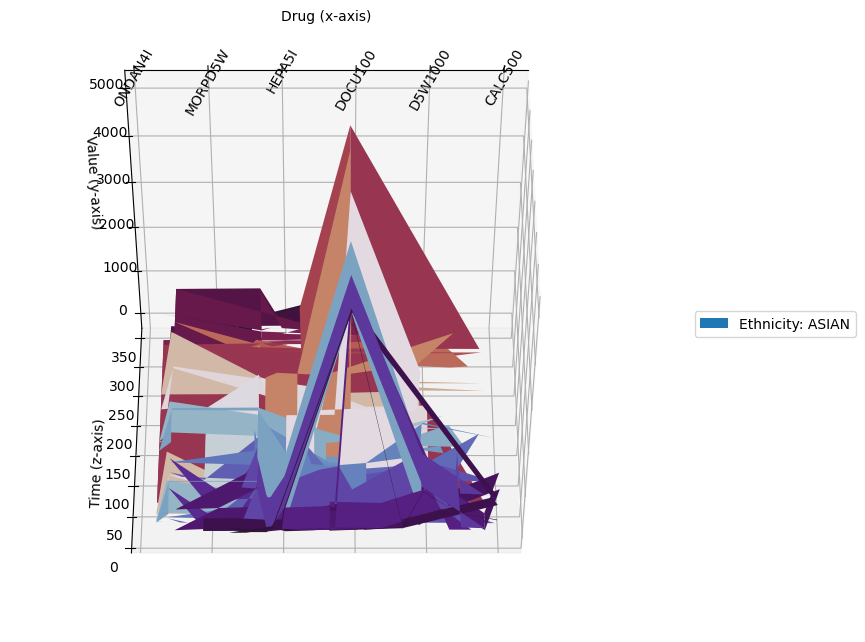

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   
#%matplotlib ipympl

# Create a 3D plot
fig = plt.figure(figsize = (20, 8) )
ax = fig.add_subplot(111, projection='3d')
temp = 0

idk = ['twilight_shifted', 'twilight_shifted_r']


# Plot the 3D time series data for each patient
for ethnicity, ethnicity_df in ethnicity_dict.items():
    if ethnicity == 'ASIAN':

        x = ethnicity_df['DrugIndex']
        y = ethnicity_df['avg']
        #z = ethnicity_df['rn']
        z = np.asarray([range(len(ethnicity_df['rn'])), ethnicity_df['rn']])

        # Plot the 3D time series for each patient
        surf = ax.plot_surface(x, y, z, label=f'Ethnicity: {ethnicity}', cmap = idk[temp])
        surf._facecolors2d = surf._facecolor3d
        surf._edgecolors2d = surf._edgecolor3d
        #ax.plot(x, y, z, label=f'Ethnicity: {ethnicity}')
        temp += 1
        #if temp == 2:
        #ax.set_xticks(np.arange(len(ethnicity_df['formulary_drug_cd'])))
        ax.set_xticklabels(ethnicity_df['formulary_drug_cd'], rotation = 60)
        break
    

# Set labels
ax.set_xlabel('Drug (x-axis)')
ax.set_ylabel('Value (y-axis)')
ax.set_zlabel('Time (z-axis)')
#ax.set_xticklabels[df[]]

# Add a legend
legend = ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
#cax = fig.add_axes([0.27, 1, 0.5, 0.05])
#fig.colorbar(surf, cax=cax, orientation='horizontal')
ax.view_init(-40, 90)
# Show the plot
plt.show()


In [52]:
ethnicity_dict.items()


dict_items([('WHITE',       ethnicity     avg  rn formulary_drug_cd  DrugIndex
0         WHITE   650.0   1           ACET325          8
3         WHITE     1.0   1            ALBU3H         28
5         WHITE     1.0   1            ALTE1I         36
7         WHITE     1.0   1             ANAS1         55
8         WHITE   325.0   1            ASA325         62
...         ...     ...  ..               ...        ...
15579     WHITE    80.0  98            FURO80        369
15580     WHITE    10.0  98             DONE5        272
15582     WHITE  1000.0  99            NS1000        671
15583     WHITE   500.0  99             NS500        682
15584     WHITE     1.5  99             WARF1        944

[9391 rows x 5 columns]), ('ASIAN',       ethnicity     avg  rn formulary_drug_cd  DrugIndex
1         ASIAN   325.0   1           ACET325          8
22        ASIAN   500.0   1           CALC500        119
44        ASIAN  1000.0   1           D5W1000        215
62        ASIAN   100.0   1  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


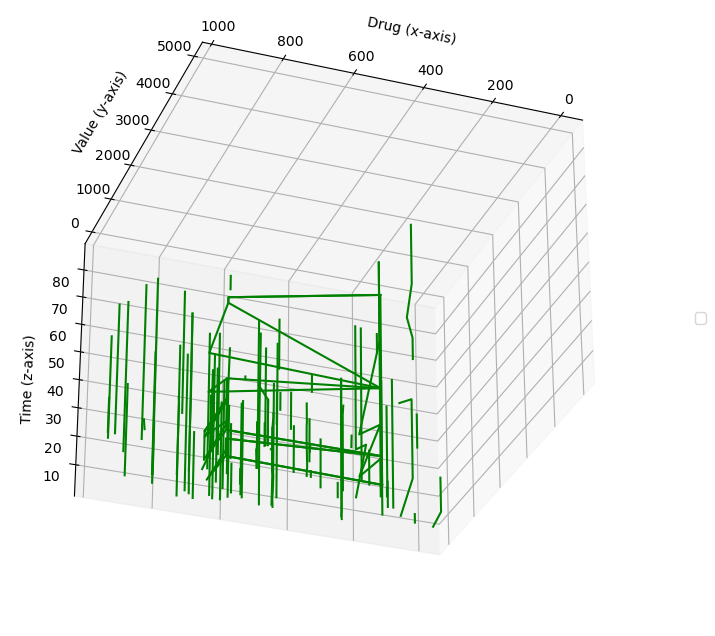

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   
#%matplotlib ipympl

# Create a 3D plot
fig = plt.figure(figsize = (20, 8) )
ax = fig.add_subplot(111, projection='3d')
temp = 0

idk = ['twilight_shifted', 'twilight_shifted_r']


# Plot the 3D time series data for each patient

for ethnicity, ethnicity_df in ethnicity_dict.items():
    a = ethnicity_df['formulary_drug_cd'].unique()
    #print(b)
    #print(ethnicity_df['formulary_drug_cd'].isin(a[0]))
    if ethnicity == 'ASIAN':
        index = 0
        for i in range(len(a)):
            b = ethnicity_df.loc[ethnicity_df['formulary_drug_cd'].str.contains(f'{a[index]}')]
            x = b['DrugIndex']
            y = b['avg']
            #z = ethnicity_df['rn']
            z = b['rn']

            # Plot the 3D time series for each patient
            ax.plot(x,y,z, 'g')
            # surf = ax.plot_surface(x, y, z, label=f'Ethnicity: {ethnicity}', cmap = idk[temp])
            # surf._facecolors2d = surf._facecolor3d
            # surf._edgecolors2d = surf._edgecolor3d
            #ax.plot(x, y, z, label=f'Ethnicity: {ethnicity}')
            #if temp == 2:
            #ax.set_xticks(np.arange(len(ethnicity_df['formulary_drug_cd'])))
            #ax.set_xticklabels(a[i], rotation = 60)
            index += 1
        
            
        

# Set labels
ax.set_xlabel('Drug (x-axis)')
ax.set_ylabel('Value (y-axis)')
ax.set_zlabel('Time (z-axis)')
#ax.set_xticklabels[df[]]

# Add a legend
legend = ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
#cax = fig.add_axes([0.27, 1, 0.5, 0.05])
#fig.colorbar(surf, cax=cax, orientation='horizontal')
ax.view_init(-30, 70)
# Show the plot
plt.show()


# Get new dataset, and perform ML

## Get data

In [145]:
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string with a password
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password
connection_string = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server'


# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Write your SQL query
sql_query = '''
    SELECT Died
        , gender
        , Religion
        , marital_status
        , formulary_drug_cd
        , dose_val_rx
        , dose_unit_rx
        , route
        , diseaseLabel_Flag
    FROM ADM.[dbo].[FinalDataSet]
    WHERE dose_val_rx not like '%-%'
    '''

# Execute the SQL query and store the result in a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)
# Do some post processing
df['dose_val_rx'] = df['dose_val_rx'].astype(float)
# Now df contains the result of your SQL query as a Pandas DataFrame

print(df.shape)

(23463, 9)


## A little data analysis.

In [107]:
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string with a password
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password
connection_string = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server'


# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Write your SQL query
sql_query = '''
    SELECT * FROM ADM.DBO.patients
    '''

# Execute the SQL query and store the result in a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)
# Do some post processing
#df['dose_val_rx'] = df['dose_val_rx'].astype(float)
# Now df contains the result of your SQL query as a Pandas DataFrame

print(df.shape)

(46520, 8)


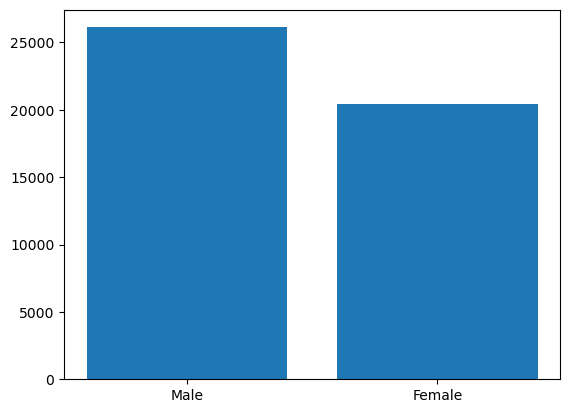

Number of:
Men   : 26121 Percentage: 56.1500429922614
Female: 20399 Percentage: 43.8499570077386


In [114]:
gender = df['GENDER']
sum(gender == 'M')
plt.bar(['Male', 'Female'], [sum(gender == 'M'), len(gender) - sum(gender == 'M')])
plt.show()
print(f'Number of:\nMen   : {sum(gender =="M")} Percentage: {sum(gender == "M")/len(gender)*100}')
print(f'Female: {sum(gender =="F")} Percentage: {sum(gender == "F")/len(gender)*100}')

(24602, 19)


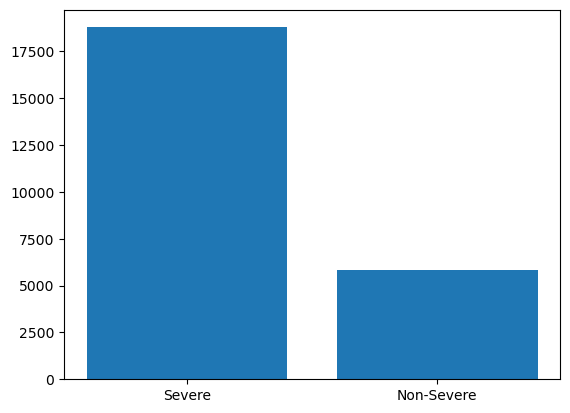

Number of:
Severe   : 18777 Percentage: 76.3230631655963
Non-Severe: 5825 Percentage: 23.676936834403705


In [144]:
import pandas as pd
from sqlalchemy import create_engine

# Define your SQL Server connection string with a password
server_name = 'LAPTOP-GTKQ06EG\SQLEXPRESS'
database_name = 'ADM'
username = 'LAPTOP-GTKQ06EG\\thire'  # Replace with your username
password = 'KAfv96zww'  # Replace with your password
connection_string = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server'


# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Write your SQL query
sql_query = '''
    SELECT * FROM ADM.DBO.finalDataSet
    '''

# Execute the SQL query and store the result in a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)
# Do some post processing
#df['dose_val_rx'] = df['dose_val_rx'].astype(float)
# Now df contains the result of your SQL query as a Pandas DataFrame

print(df.shape)
sick = df['DiseaseLabel_Flag']
sum(sick == 1)
plt.bar(['Severe', 'Non-Severe'], [sum(sick == 1), len(sick) - sum(sick == 1)])
plt.show()
print(f'Number of:\nSevere   : {sum(sick ==1)} Percentage: {sum(sick == 1)/len(sick)*100}')
print(f'Non-Severe: {sum(sick ==0)} Percentage: {sum(sick == 0)/len(sick)*100}')

## Preprocessing

In [146]:
# Identify columns with string values that you want to one-hot encode
string_columns = df.select_dtypes(include=['object']).columns

# Use get_dummies to perform one-hot encoding for the identified columns
df_encoded = pd.get_dummies(df, columns=string_columns)

In [147]:
df_encoded

,Died,dose_val_rx,diseaseLabel_Flag,gender_F,gender_M,Religion_7TH DAY ADVENTIST,Religion_BUDDHIST,Religion_CATHOLIC,Religion_CHRISTIAN SCIENTIST,Religion_EPISCOPALIAN,...,route_PO/NG,route_PR,route_REPLACE,route_RIGHT EYE,route_SC,route_SL,route_SUBCUT,route_TD,route_TP,route_VG
0,0,500.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1000.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,500.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,250.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,500.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,0,4.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23459,0,5000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23460,0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23461,0,500.0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [148]:
# Separate the target variable (y) and features (X)
y = df_encoded['diseaseLabel_Flag']
X = df_encoded.drop(columns=['diseaseLabel_Flag'])


In [149]:
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X, axis = 1)
print(pd.DataFrame(X_normalized))

       0         1         2      3     4     5     6     7     8     9     \
0       0.0  0.999988  0.000000  0.002   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0  0.999997  0.000000  0.001   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0  0.999988  0.000000  0.002   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0  0.999952  0.000000  0.004   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0  0.999988  0.000000  0.002   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...       ...       ...    ...   ...   ...   ...   ...   ...   ...   
23458   0.0  0.852803  0.213201  0.000   0.0   0.0   0.0   0.0   0.0   0.0   
23459   0.0  1.000000  0.000200  0.000   0.0   0.0   0.0   0.0   0.0   0.0   
23460   0.0  0.377964  0.377964  0.000   0.0   0.0   0.0   0.0   0.0   0.0   
23461   0.0  0.999988  0.002000  0.000   0.0   0.0   0.0   0.0   0.0   0.0   
23462   0.0  0.992583  0.049629  0.000   0.0   0.0   0.0   0.0   0.0   0.0   

       ...      1043  1044  1045  1046    1047  1048  1049  105

In [150]:
print(sum(y == 0))
print(len(y))
print(((sum(y == 0))/len(y))*100)


5514
23463
23.500831095767804


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(sum(y_train == 0))
print(len(y_train))
print(((sum(y_train == 0))/len(y_train))*100)

3151
13139
23.98203820686506


In [152]:
from sklearn.ensemble import RandomForestClassifier

f1score_RF = []
max_depth_lst = [1, 2, 10, 30, 50, 100]
for i in max_depth_lst:
    print(f'max depth: {i}')
    clf = RandomForestClassifier(max_depth = i, random_state=0)
    clf.fit(X_train, y_train)

    f1score_RF.append(clf.score(X_val, y_val))

max depth: 1
max depth: 2
max depth: 10
max depth: 30
max depth: 50
max depth: 100


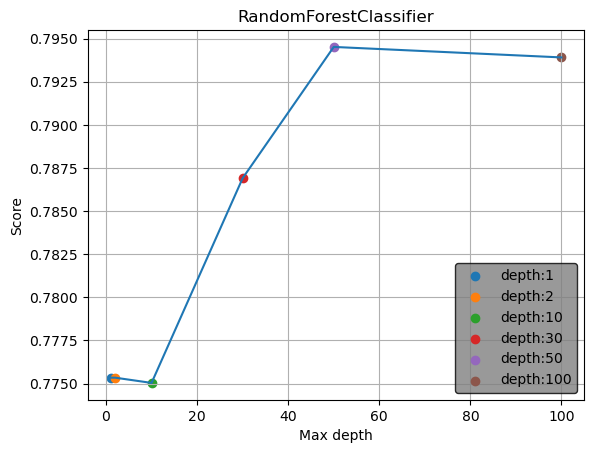

In [155]:
plt.title(f'{clf.__class__.__name__}')
plt.plot(max_depth_lst, f1score_RF)
index = 0
for i in max_depth_lst:
    plt.scatter(i, f1score_RF[index], label = f'depth:{i}')
    index += 1
plt.grid()
plt.xlabel('Max depth')
plt.ylabel('Score')
legend = plt.legend(loc = 'lower right', frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('grey') 
frame.set_edgecolor('black')
plt.show()

In [156]:
from sklearn.linear_model import Perceptron
clf2 = Perceptron(tol=1e-3, random_state=0, max_iter= 10000, penalty='elasticnet')
clf2.fit(X_train, y_train)
clf2.score(X_val, y_val)

0.7753424657534247

In [ ]:
clf = RandomForestClassifier(max_depth = 50, random_state=0)
clf.fit(X_train, y_train)

In [157]:
a = clf.score(X_test, y_test)
b = clf2.score(X_test, y_test)

print(f'Accuracy on test data\nPerceptron:\t{b}\nRandForest:\t{a}')

Accuracy on test data
Perceptron:	0.7691433442250319
RandForest:	0.7967040772837051


In [47]:
import pandas as pd

# Sample DataFrame with more columns
df = pd.DataFrame({
    'ethnicity': ['Asian', 'White', 'Asian', 'White', 'White', 'Asian', 'White', 'Asian', 'Asian', 'White', 'Asian', 'White', 'White', 'White', 'White'],
    'drugs': ['DrugA', 'DrugB', 'DrugA', 'DrugB', 'DrugC', 'DrugA', 'DrugB', 'DrugA', 'DrugC', 'DrugB', 'DrugA', 'DrugC', 'DrugB', 'DrugC', 'DrugA'],
    'value1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'value2': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    'value3': [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
})

# Create a nested dictionary to store data for each ethnicity and each drug
ethnicity_drug_dict = {}

# Iterate over unique ethnicities
for ethnicity in df['ethnicity'].unique():
    # Filter rows for the current ethnicity
    ethnicity_rows = df[df['ethnicity'] == ethnicity].copy()
    
    # Create an inner dictionary to store data for each drug
    drug_dict = {}
    
    # Iterate over unique drugs in the current ethnicity
    for drug in ethnicity_rows['drugs'].unique():
        # Filter rows for the current drug
        drug_rows = ethnicity_rows[ethnicity_rows['drugs'] == drug].copy()
        
        # Drop the 'ethnicity' and 'drugs' columns if needed
        drug_rows = drug_rows.drop(columns=['ethnicity', 'drugs'])
        
        # Add the drug name as the key and the list of values as the value
        drug_dict[drug] = drug_rows.values.tolist()
    
    # Add the inner dictionary to the outer dictionary with ethnicity as the key
    ethnicity_drug_dict[ethnicity] = drug_dict

# Print the resulting nested dictionary
print(ethnicity_drug_dict)


{'Asian': {'DrugA': [[1, 21, 41], [3, 23, 43], [6, 26, 46], [8, 28, 48], [11, 31, 51]], 'DrugC': [[9, 29, 49]]}, 'White': {'DrugB': [[2, 22, 42], [4, 24, 44], [7, 27, 47], [10, 30, 50], [13, 33, 53]], 'DrugC': [[5, 25, 45], [12, 32, 52], [14, 34, 54]], 'DrugA': [[15, 35, 55]]}}
